# Photoelectric Lab Data Analysis

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches 
plt.style.use('seaborn-whitegrid') # puts gridlines in background of plot

## Data collected for applied voltage (volts) and photocurrent (nanoamperes). 

In [80]:
applied_v = np.linspace(0, 1.6, 17)
current1 = [28.5, 16.5, 10., 5.5, 3.0, 1.5, 1.0, .5, 0, 0, 0, 0, 0]
current2 = [20., 11.5, 6.5, 3.5, 2., 1., .5, 0, 0, 0, 0]
current3 = [11., 10., 6., 3., 2., 1., 0.5, 0.5, 0, 0, 0, 0, 0, 0]
current4 = [22., 15., 10., 5., 2.5, 1., 0.5, 0, 0, 0, 0, 0]
current5 = [1.5, 1.0, .5, 0, 0, 0, 0, 0, 0]
current6 = [1., 1., 0, 0, 0, 0, 0]
current7 = [1., 0.5, 0, 0, 0, 0]

### Plotting applied voltage vs photocurrent

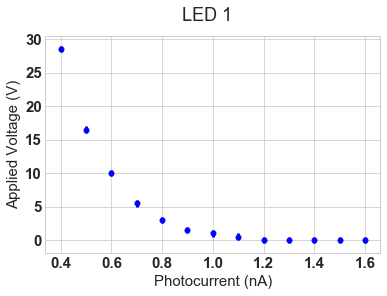

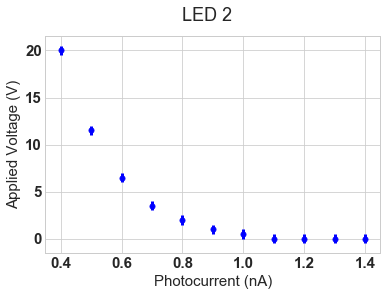

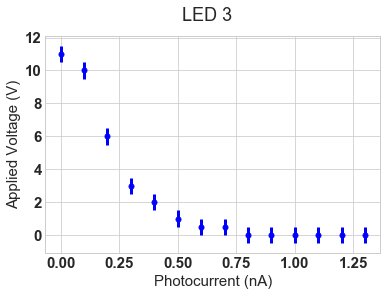

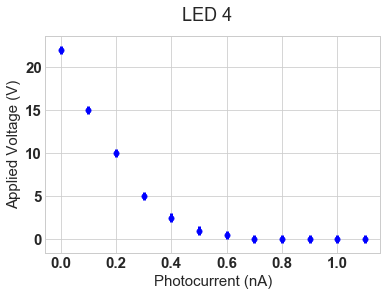

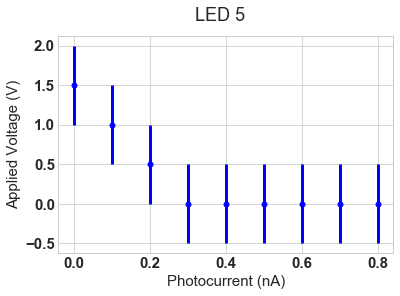

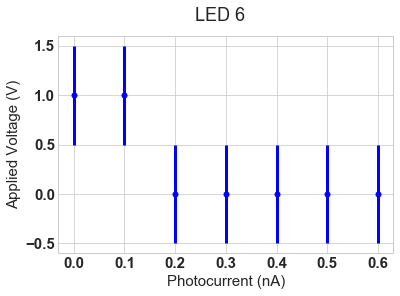

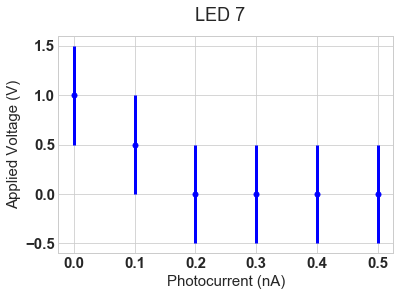

In [81]:
err = 0.5 # The ammeter can measure in increments of 1 nA, which is why err is 0.5 nA

plt.figure(1)
plt.errorbar(applied_v[4:], current1, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 1")
plt.savefig('current1.png')

plt.figure(2)
plt.errorbar(applied_v[4:15], current2, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 2")
plt.savefig('current2.png')

plt.figure(3)
plt.errorbar(applied_v[:14], current3, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 3")
plt.savefig('current3.png')

plt.figure(4)
plt.errorbar(applied_v[:12], current4, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 4")
plt.savefig('current4.png')

plt.figure(5)
plt.errorbar(applied_v[:9], current5, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 5")
plt.savefig('current5.png')

plt.figure(6)
plt.errorbar(applied_v[:7], current6, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 6")
plt.savefig('current6.png')

plt.figure(7)
plt.errorbar(applied_v[:6], current7, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 7")
plt.savefig('current7.png')


# Data collected for wavelength (nanometers) and stopping potential (volts)

In [82]:
"""led_w stores the low, middle, and high wavelengths for each LED, where the ith row stores the ith LED's measurments, with 
i starting at 1.

led_v stores the stopping potential measurments for each led, where the ith row stores the ith LED's stopping potentials
"""

led_w = np.array([[430, 450, 510],
                  [440, 460, 530],
                  [480, 510, 560],
                  [500, 530, 570],
                  [560, 580, 610],
                  [590, 630, 640],
                  [620, 660, 670]], dtype = np.float32)

led_v = np.array([[1.3511, 1.2456, 1.2353, 1.3727, 1.2314],
                 [1.1115, 1.0150, 1.1572, 1.1580, 1.1155],
                 [.9392, 1.1106, 1.0362, 1.0131, 1.1113],
                 [1.1086, .8363, .7711, .6712, .7046],
                 [.3602, .6097, .3728, .4074, .6248],
                 [.2274, .2694, .2101, .2547, .2908],
                 [.2059, .1719, .1674, .1941, .2060]])

## Calculating uncertainties and averages in wavelength and stopping potential

In [83]:
stdw = np.std(led_w, axis = 1)
# Converting from population standard deviation to sample standard deviation
stdw **= 2
stdw *= 3
stdw *= 0.5
stdw **= 0.5

stdv = np.std(led_v, axis = 1)
# Converting from population standard deviation to sample standard deviation
stdv **= 2
stdv *= 5
stdv *= .25
stdv **= 0.5

avg_w = np.mean(led_w, axis = 1) # average wavelength
avg_v = np.mean(led_v, axis = 1) # average stopping potential

stdw, stdv, avg_w, avg_v # uncertainty wavelength, uncertainty stopping potential, average wavelength, average stop potential

(array([41.633316, 47.25816 , 40.414516, 35.118847, 25.166115, 26.457514,
        26.457514], dtype=float32),
 array([0.06879547, 0.05826442, 0.07236212, 0.17420678, 0.13112758,
        0.03226727, 0.01843619]),
 array([463.33334, 476.66666, 516.6667 , 533.3333 , 583.3333 , 620.     ,
        650.     ], dtype=float32),
 array([1.28722, 1.11144, 1.04208, 0.81836, 0.47498, 0.25048, 0.18906]))

## Calculating combined uncommon estimated error in stopping potential for each data point

In [84]:
# Keep in mind that we are interested in the uncertainty in the average wavelength for each LED. For this reason, 
# we use equation 9 to find the uncertainty in the average wavelength. We do not simply calculate the uncertainty in the average
# wavelength to be the sample standard deviation for a given LED. This would yield an incorrect result.

# Using eq. 9 in data analysis primer to find uncertainty in average wavelength and uncertainty in average stopping potential
stdw /= np.sqrt(3) 
stdv /= np.sqrt(5)

# calculating uncertainty in wavelength using uncommon systematic error and statistical error using eq. 12 and eq. 21
uncert_w = np.sqrt(stdw**2 + 5**2) 

# calculating uncertainty in reciprocal wavelength with eq. 17                                
uncert_recip = -1 / (avg_w)**2 * uncert_w 

# calculating combined uncommon estimated error in y for each point using eq. 21
temp_slope = (avg_v[0] - avg_v[-1]) / (1 / avg_w[0] - 1 / avg_w[-1]) 
comb_err = np.sqrt((temp_slope * uncert_recip)**2 + stdv**2)
comb_err

array([0.20494939, 0.21786796, 0.16165598, 0.15162496, 0.09919718,
       0.07547435, 0.06790387])

# Determining best fit function and associated errors

In [85]:
delta = sum(1/comb_err**2) * sum((1 / avg_w)**2/comb_err**2) - (sum((1 / avg_w)/comb_err**2))**2
m = (sum(1/comb_err**2) * sum((1 / avg_w)*avg_v/comb_err**2) - sum((1 / avg_w)/comb_err**2) * sum(avg_v/comb_err**2)) / delta
b = (sum((1 / avg_w)**2/comb_err**2) * sum(avg_v/comb_err**2) - sum((1 / avg_w)/comb_err**2) * sum((1 / avg_w)*avg_v/comb_err**2)) / delta

errm = math.sqrt(sum(1/comb_err**2) / delta)
errb = math.sqrt(sum((1 / avg_w)**2/comb_err**2) / delta)
fittemp = m*((1 / avg_w)) + b

#calculating chi-squared
deg_of_freedom = 5
chisq = sum((avg_v - fittemp)**2/comb_err**2)
reduced_chisq = chisq / deg_of_freedom

# Plotting line of best fit

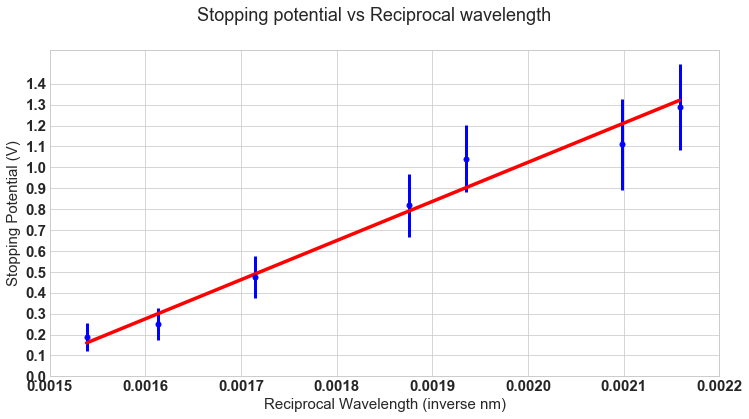

In [86]:
plt.figure(8)
plt.errorbar(1/avg_w, avg_v, yerr = comb_err, fmt = "bo", markersize = "5", linewidth=3)

plt.ylabel("Stopping Potential (V)")
plt.xlabel("Reciprocal Wavelength (inverse nm)")
plt.suptitle("Stopping potential vs Reciprocal wavelength")

plt.plot((1 / avg_w), m*(1 / avg_w) + b, "-r", linewidth = 3.5) # plots the line of best fit

plt.yticks(np.arange(0, 1.5, .1))
plt.xticks(np.arange(.0015, .0022, .0001))

#customizing plot size
plt.gcf().set_size_inches(12, 6) 

#customizing font style
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

plt.savefig('stop_p_vs_recip_w.png')

In [87]:
m_rounded = str(round(float(m), 3))
merr_rounded = str(round(float(errm), 3))
b_rounded = str(round(float(b), 3))
berr_rounded = str(round(float(errb), 3))
chisq_rounded = str(round(float(chisq), 2))
reduced_chisq_rounded = str(round(float(reduced_chisq), 2))

uncertainties = ["fit slope = " + m_rounded + u" \u00B1 " + merr_rounded,
"fit intercept = " + b_rounded + u" \u00B1 " + berr_rounded,
"Chi-squared: " + str(chisq_rounded),
"Reduced Chi-squared: " + str(reduced_chisq_rounded)]

In [88]:
uncertainties

['fit slope = 1872.651 ± 232.302',
 'fit intercept = -2.721 ± 0.392',
 'Chi-squared: 1.62',
 'Reduced Chi-squared: 0.32']

# Calculating Plank's constant

In [89]:
e = 1.602e-19
c = 2.988e8


h = (m * e * 1e-9) / c  # h is the estimated value for plank's constant
herr = (e/c) * errm * 1e-9

print("Plank's constant = " + str(h) + " +/- " + str(herr) + " Joule seconds")

Plank's constant = 1.0040117839114651e-33 +/- 1.2454753051559425e-34 Joule seconds


In [113]:
# The actual value of h is roughly 1 standard deviation below the value we calculated for h
print("Actual value of h = 6.01e-34 Joule seconds")
print("Calculated value of h = " + str(h) + " +/- " + str(herr) + " Joule seconds")
print("Percent error for experimentally determined Plank's constant = " + str((h - 6.01e-34) * 100 / 6.01e-34) + " %")

Actual value of h = 6.01e-34 Joule seconds
Calculated value of h = 1.0040117839114651e-33 +/- 1.2454753051559425e-34 Joule seconds
Percent error for experimentally determined Plank's constant = 67.0568692032388 %


# Calculating work function

In [91]:
# wf is the estimated work function of the photocathode material
wf = (h * c / (avg_w * 1e-9)) - e * avg_v 
wf = np.mean(wf) 

# using eq. 15 from primer. Note that I use stdv instead of comb_err to ensure the errors being combined are uncorrelated.
# Had I used comb_err, the errors being combined below would have been correlated, yielding an incorrect result
wferr = np.sqrt((-e * stdv) ** 2 + ((-h * c / ((avg_w * 1e-9)**2)) * (stdw * 1e-9)) ** 2) 
wferr = np.mean(wferr)

print("Work function = " + str(wf) + " +/- " + str(wferr) + " Joules")

Work function = 4.358375146855574e-19 +/- 2.295167860568817e-20 Joules


# Calculating threshold wavelength

In [92]:
# The threshold wavelength is "the maximum wavelength for the PE effect with zero applied voltage". This equals the 
# reciprocal of the x-intercept of the line of best fit. 

thresh_w = 1 / (- b / m)

# eq. 15 from primer
temp1 = ((-1/m) * errb) ** 2
temp2 = ((b / (m**2)) * errm) ** 2

recip_werr = np.sqrt(temp1 + temp2) # This is the uncertainty in reciprocal wavelength, in nm

# converting uncertainty in reciprocal wavelength to uncertainty in wavelength
thresh_werr = (thresh_w ** 2) * recip_werr 

print("Threshold wavelength = " + str(thresh_w) + " +/- " + str(thresh_werr) + " nm")

Threshold wavelength = 688.207794862279 +/- 130.85968131405622 nm
